In [38]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
def get_image_data_generator(train=True):
    if train:
        return ImageDataGenerator(
            rescale=1. / 255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
        )
    else:
        return ImageDataGenerator(
            rescale=1./255,
        )


Showing augmentations for class: Sunrise, image: sunrise191.jpg


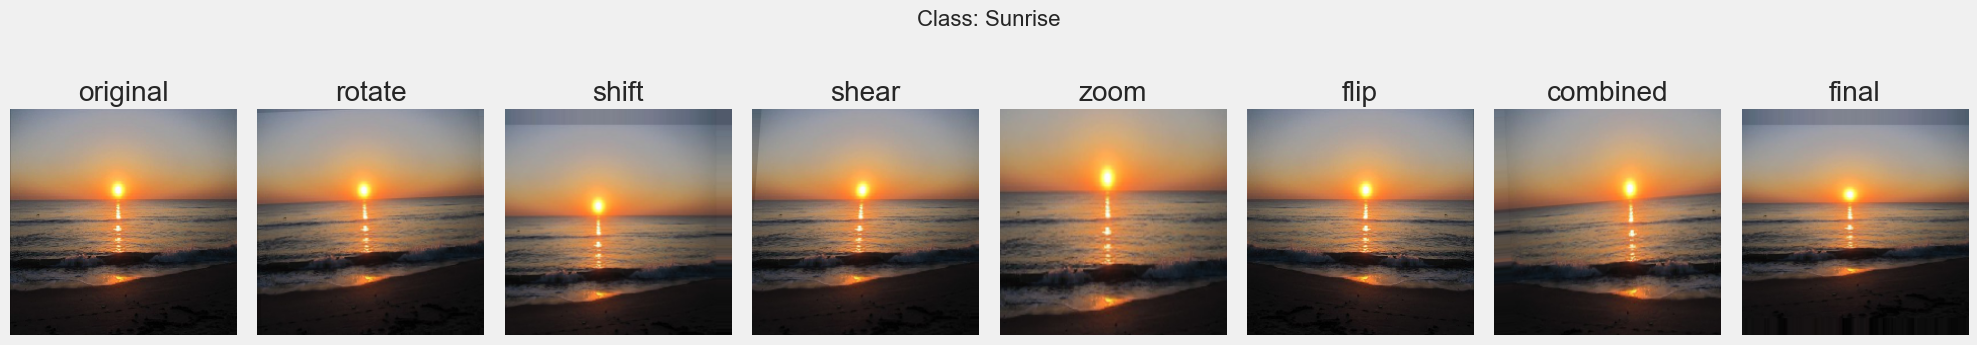


Showing augmentations for class: Shine, image: shine137.jpg


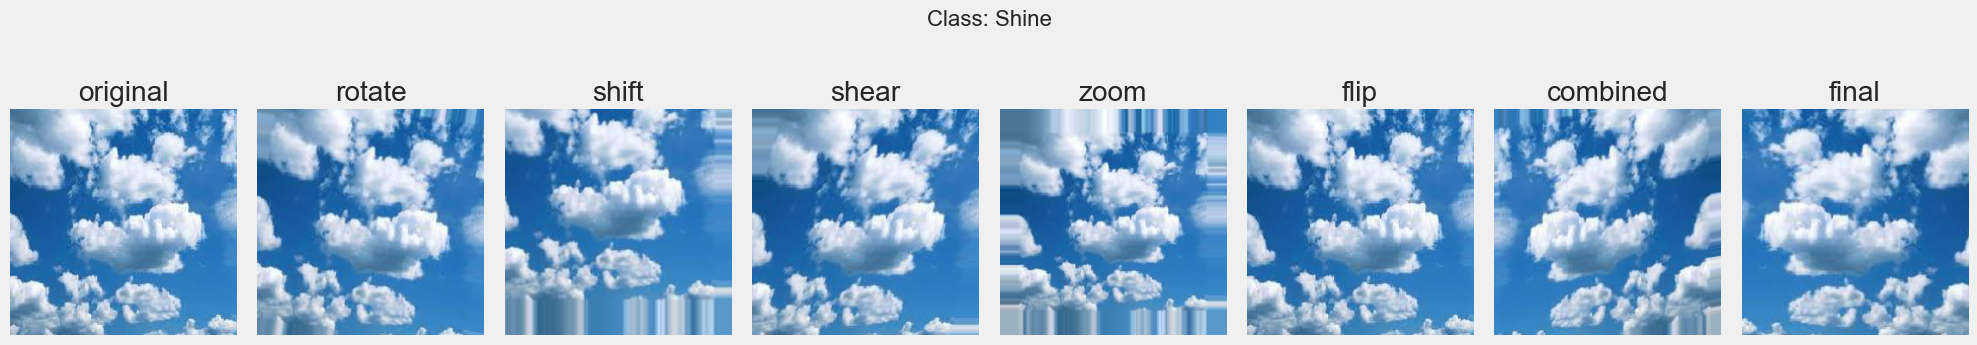


Showing augmentations for class: Cloudy, image: cloudy181.jpg


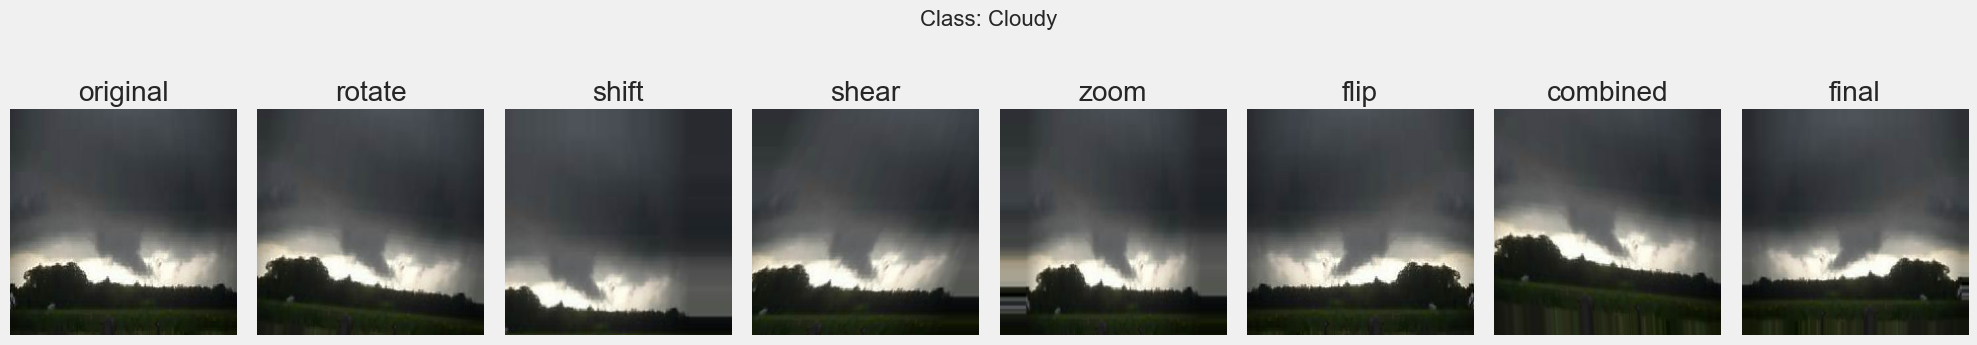


Showing augmentations for class: Rain, image: rain158.jpg


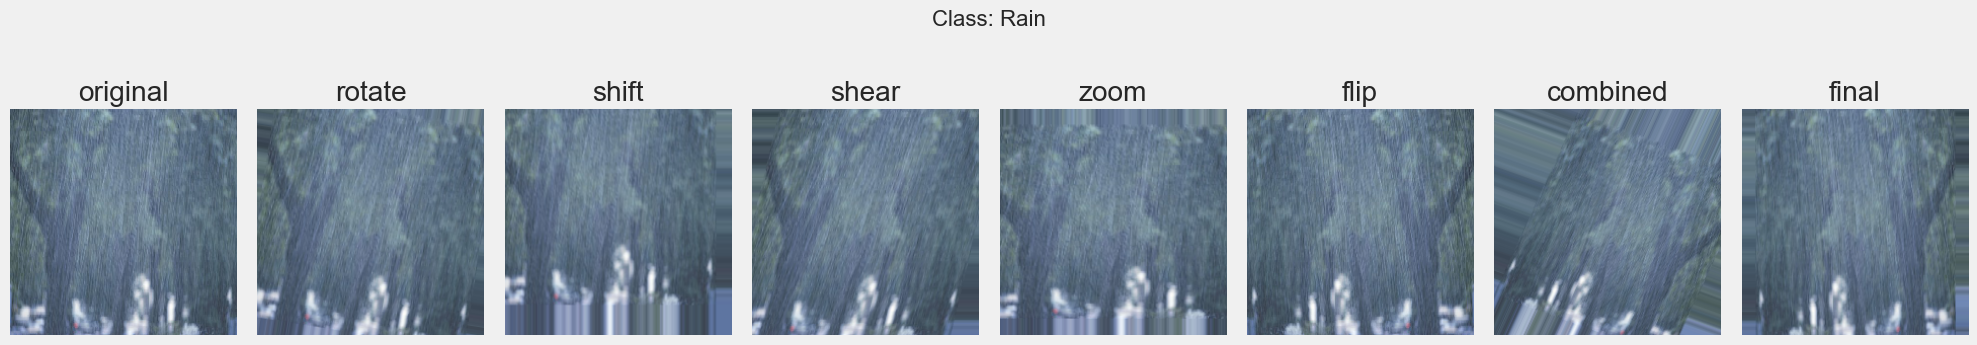

In [40]:

DATA_DIR = './Multi-class Weather Dataset'
IMG_SIZE = (224, 224)

# load file path and labels
filepaths, labels = [], []
for class_name in os.listdir(DATA_DIR):
    class_dir = os.path.join(DATA_DIR, class_name)
    if os.path.isdir(class_dir):
        for fname in os.listdir(class_dir):
            filepaths.append(os.path.join(class_dir, fname))
            labels.append(class_name)

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# image generator config
generators = {
    "original": ImageDataGenerator(rescale=1./255),
    "rotate": ImageDataGenerator(rescale=1./255, rotation_range=30),
    "shift": ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2),
    "shear": ImageDataGenerator(rescale=1./255, shear_range=20),
    "zoom": ImageDataGenerator(rescale=1./255, zoom_range=0.3),
    "flip": ImageDataGenerator(rescale=1./255, horizontal_flip=True),
    "combined": ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=10,
        zoom_range=0.2,
        horizontal_flip=True
    ),
    "final": get_image_data_generator(train=True)
}

# show samples with different image generator
classes = df['labels'].unique()

for cls in classes:
    sample_row = df[df['labels'] == cls].iloc[0]
    img_path = sample_row['filepaths']
    print(f"\nShowing augmentations for class: {cls}, image: {os.path.basename(img_path)}")

    # original image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # visualize the performance of different image generator
    fig, axes = plt.subplots(1, len(generators), figsize=(20, 4))
    for ax, (name, gen) in zip(axes, generators.items()):
        aug_iter = gen.flow(x, batch_size=1, shuffle=False)
        aug_img = next(aug_iter)[0]
        ax.imshow(aug_img)
        ax.set_title(name)
        ax.axis('off')

    plt.suptitle(f'Class: {cls}', fontsize=16)
    plt.tight_layout()
    plt.show()